In [2]:
import pandas as pd

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data/creditcard.csv", delimiter=",")
df.dataframeName = "creditcard.csv"

df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler


X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
def get_classifier(classifier_name, weights=None):

    if classifier_name == "knn":
        return KNeighborsClassifier()
    elif classifier_name == "bayes":
        return GaussianNB()
    elif classifier_name == "svm":
        return SVC(class_weight=weights if weights else None)
    elif classifier_name == "logistic":

        return LogisticRegression(class_weight=weights if weights else None)
    else:
        raise ValueError("Invalid classifier name. Choose from 'knn', 'bayes', 'svm', 'logistic'.")


def fit(x_train_data, y_train_data, x_test_data, y_test_data, classifier):

    classifier.fit(x_train_data, y_train_data)
    y_pred = classifier.predict(x_test_data)

    accuracy = accuracy_score(y_test_data, y_pred)
    f1 = f1_score(y_test_data, y_pred)
    precision = precision_score(y_test_data, y_pred)
    recall = recall_score(y_test_data, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")

    get_cm_matrix(y_test_data, y_pred)


def get_cm_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"]
    )
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Classifier: knn
Accuracy: 0.9995259997893332
F1 Score: 0.8491620111731844
Precision: 0.9382716049382716
Recall: 0.7755102040816326


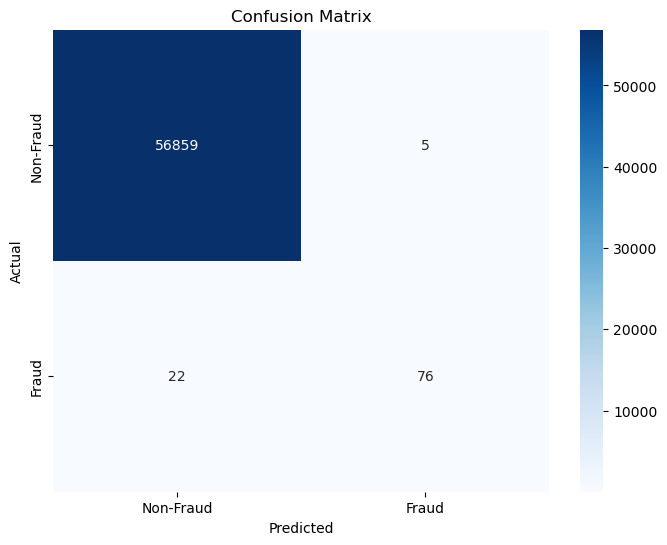


Classifier: bayes
Accuracy: 0.9778273234788104
F1 Score: 0.11243851018973998
Precision: 0.06037735849056604
Recall: 0.8163265306122449


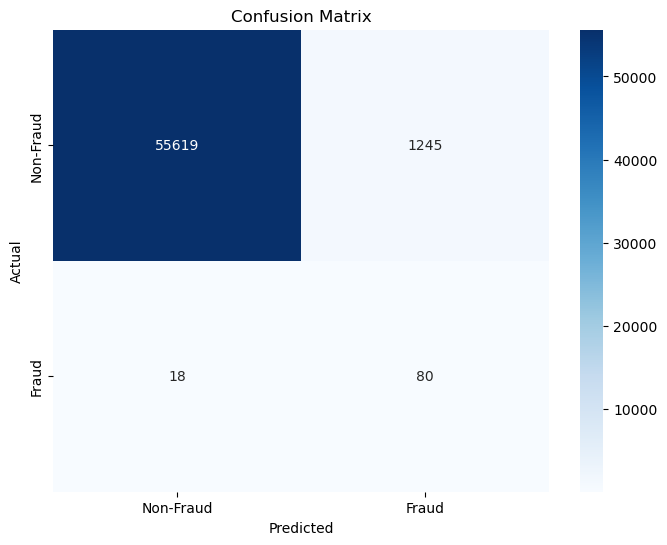


Classifier: svm
Accuracy: 0.9993153330290369
F1 Score: 0.7577639751552795
Precision: 0.9682539682539683
Recall: 0.6224489795918368


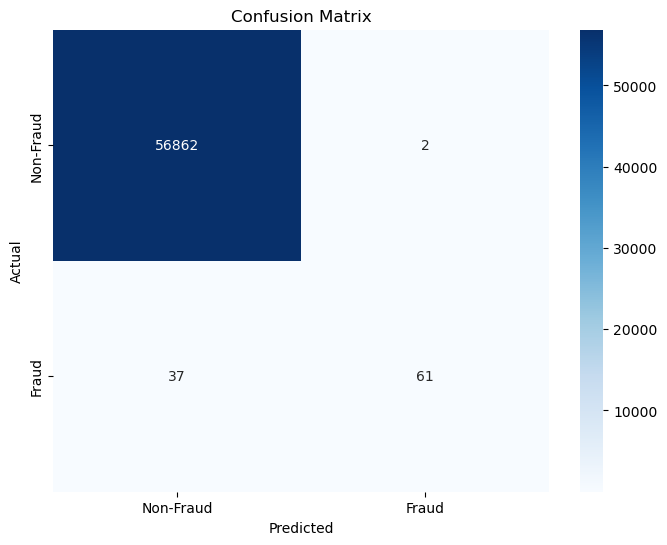


Classifier: logistic
Accuracy: 0.9990695551420246
F1 Score: 0.6748466257668712
Precision: 0.8461538461538461
Recall: 0.5612244897959183


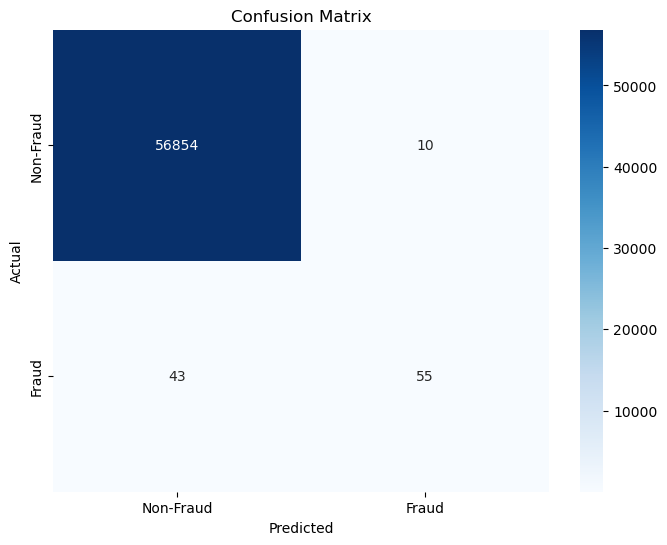

In [6]:
for classifier_name in ["knn", "bayes", "svm", "logistic"]:
    print(f"Classifier: {classifier_name}")
    classifier = get_classifier(classifier_name)
    fit(X_train, y_train, X_test, y_test, classifier)
    print()

---


In [7]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [8]:
rus = RandomUnderSampler(random_state=42)

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

y_train_rus.value_counts()

Class
0    394
1    394
Name: count, dtype: int64

In [9]:
# oversampling
X_train_ros, y_train_ros = RandomOverSampler(random_state=42).fit_resample(X_train, y_train)
y_train_ros.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

In [10]:
# SMOTE
X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train, y_train)
y_train_smote.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

Random Under Sampling
Classifier: knn
Accuracy: 0.976896878620835
F1 Score: 0.11796246648793565
Precision: 0.06312769010043041
Recall: 0.8979591836734694


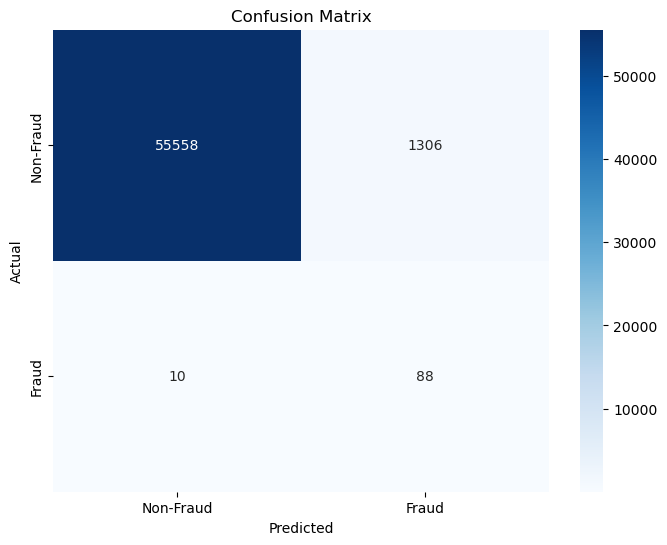



Random Over Sampling
Classifier: knn
Accuracy: 0.9991397773954567
F1 Score: 0.7741935483870968
Precision: 0.7058823529411765
Recall: 0.8571428571428571


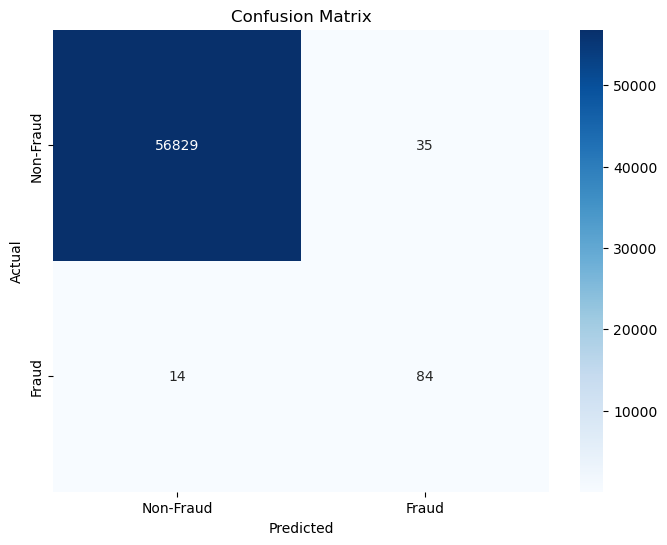



SMOTE
Classifier: knn
Accuracy: 0.9981742214107651
F1 Score: 0.6204379562043796
Precision: 0.48295454545454547
Recall: 0.8673469387755102


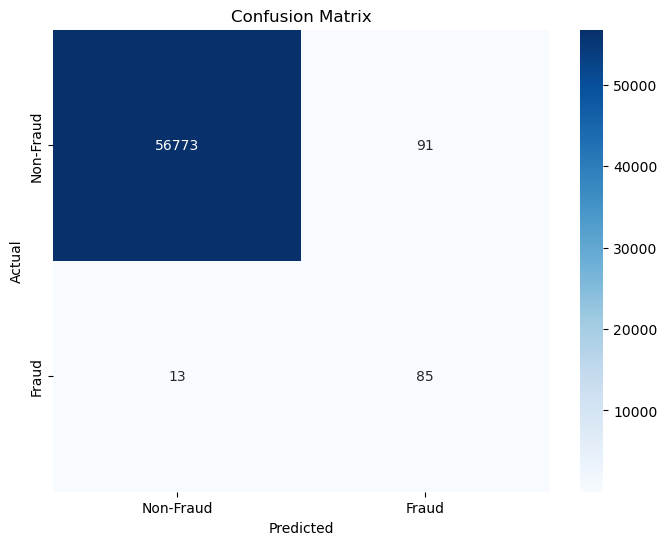

In [11]:
for data, label in [
    ("Random Under Sampling", (X_train_rus, y_train_rus)),
    ("Random Over Sampling", (X_train_ros, y_train_ros)),
    ("SMOTE", (X_train_smote, y_train_smote)),
]:
    print(data)
    for classifier_name in ["knn"]:
        classifier = get_classifier(classifier_name)
        print(f"Classifier: {classifier_name}")
        fit(label[0], label[1], X_test, y_test, classifier)
        print()
    print()

Classifier: svm
Accuracy: 0.9993328885923949
F1 Score: 0.7682926829268293
Precision: 0.9545454545454546
Recall: 0.6428571428571429


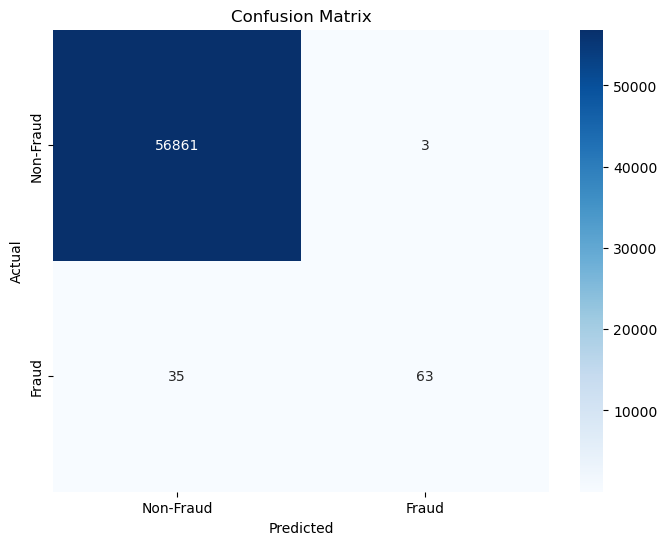


Classifier: logistic
Accuracy: 0.9992275552122467
F1 Score: 0.7582417582417582
Precision: 0.8214285714285714
Recall: 0.7040816326530612


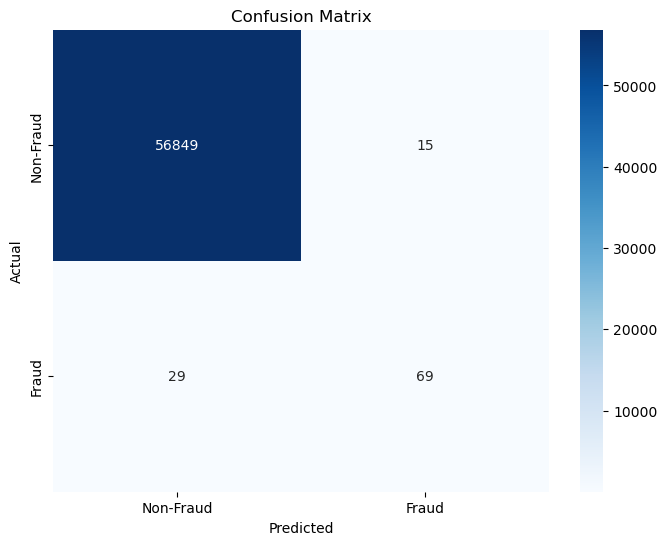

In [12]:
weights = {0: 0.5, 1: 1}
for classifier_name in ["svm", "logistic"]:
    print(f"Classifier: {classifier_name}")
    classifier = get_classifier(classifier_name, weights)
    fit(X_train, y_train, X_test, y_test, classifier)
    print()

In [22]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import MinMaxScaler

import torch.nn as nn
import torch.optim as optim


# class Autoencoder(nn.Module):
#     def __init__(self, input_dim):
#         super(Autoencoder, self).__init__()
#         self.encoder = nn.Sequential(
#             nn.Linear(input_dim, 64), nn.ReLU(), nn.Linear(64, 32), nn.ReLU(), nn.Linear(32, 16), nn.ReLU()
#         )
#         self.decoder = nn.Sequential(
#             nn.Linear(16, 32), nn.ReLU(), nn.Linear(32, 64), nn.ReLU(), nn.Linear(64, input_dim)
#         )

#     def forward(self, x):
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded


class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


ae_data = df
x_data_train, x_data_test = train_test_split(ae_data, test_size=0.2, random_state=42)
x_train_ae = x_data_train[x_data_train["Class"] == 0].drop("Class", axis=1)

x_test_ae = x_data_test.drop("Class", axis=1)

X_train_tensor = torch.tensor(x_train_ae.values, dtype=torch.float32)
X_test_tensor = torch.tensor(x_test_ae.values, dtype=torch.float32)
# scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_tensor = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
X_test_tensor = torch.tensor(scaler.transform(X_test), dtype=torch.float32)
train_loader = DataLoader(TensorDataset(X_train_tensor), batch_size=64, shuffle=True)

input_dim = X_train.shape[1]
model = Autoencoder(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch in train_loader:
        data = batch[0]
        optimizer.zero_grad()
        reconstructed = model(data)
        loss = criterion(reconstructed, data)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_loss / len(train_loader)}")

model.eval()
with torch.no_grad():
    reconstructed = model(X_test_tensor)
    reconstruction_loss = torch.mean((reconstructed - X_test_tensor) ** 2, dim=1)

threshold = torch.quantile(reconstruction_loss, 0.95)


anomalies = reconstruction_loss > threshold


anomalies_np = anomalies.cpu().numpy()

accuracy = accuracy_score(y_test, anomalies_np)
precision = precision_score(y_test, anomalies_np)
recall = recall_score(y_test, anomalies_np)
f1 = f1_score(y_test, anomalies_np)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Epoch 1/10, Loss: 0.09683609070720314
Epoch 2/10, Loss: 0.03375672941977235
Epoch 3/10, Loss: 0.041770727475396334
Epoch 4/10, Loss: 0.03607899055216536
Epoch 5/10, Loss: 0.031855873461358715
Epoch 6/10, Loss: 0.03286026675205461
Epoch 7/10, Loss: 0.028287625581099828
Epoch 8/10, Loss: 0.02519475277191579
Epoch 9/10, Loss: 0.024493492797068882
Epoch 10/10, Loss: 0.019609273373345747
Accuracy: 0.9511428671746076
Precision: 0.028782028782028783
Recall: 0.8367346938775511
F1 Score: 0.05564981336952833


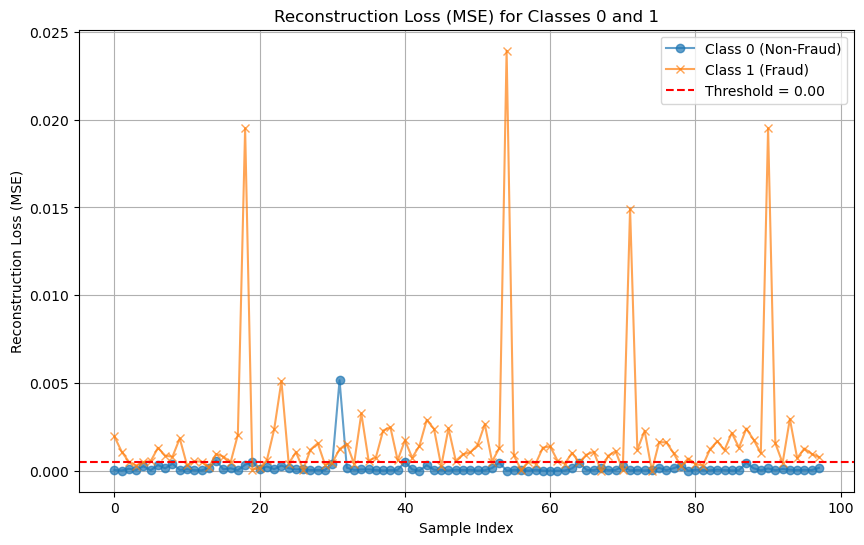

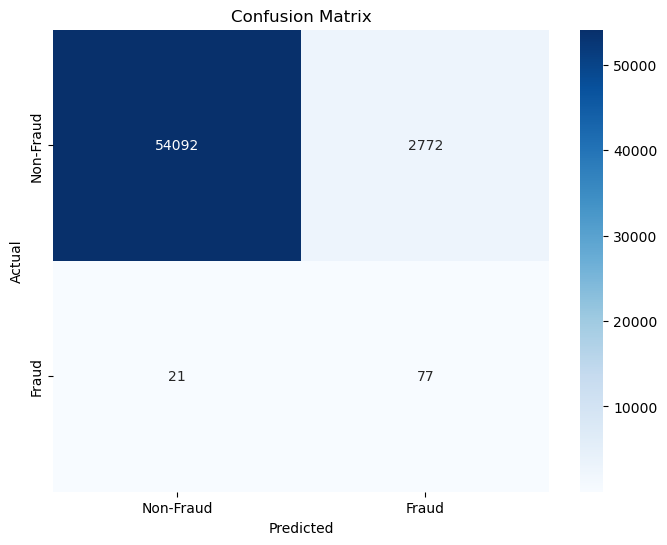

In [21]:
import matplotlib.pyplot as plt

rec_loss = reconstruction_loss.cpu().numpy()
reconstruction_df = pd.DataFrame({"Reconstruction Loss": rec_loss, "Class": y_test})
reconstruction_df["Anomaly"] = anomalies_np

plt.figure(figsize=(10, 6))
mse_class_0 = reconstruction_df[reconstruction_df["Class"] == 0]["Reconstruction Loss"].values
mse_class_1 = reconstruction_df[reconstruction_df["Class"] == 1]["Reconstruction Loss"].values

plt.plot(mse_class_0[: len(mse_class_1)], label="Class 0 (Non-Fraud)", linestyle="-", marker="o", alpha=0.7)
plt.plot(mse_class_1, label="Class 1 (Fraud)", linestyle="-", marker="x", alpha=0.7)

plt.axhline(y=threshold.item(), color="r", linestyle="--", label=f"Threshold = {threshold.item():.2f}")

plt.title("Reconstruction Loss (MSE) for Classes 0 and 1")
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()
get_cm_matrix(y_test, anomalies_np)
#

## Wnioski

- Z pośród metod klasyfikacji `["knn", "bayes", "svm", "logistic"]` najlepsze wyniki osiągnęła metoda `knn` wykrywając na zbiorze testowym __77.5%__ fraudów.
- drugi z koleji najlepszy wynik osiągnęła metoda `svm` wykrywając na zbiorze testowym __62.2%__ fraudów.

- Random Undersampling dla `knn` uzyskało najwyszy wynik wykrytych fraudów __89.7%__
- Podobne wyniki były równie dla `knn` korzystającego z metod oversamplingu : random oversampling i smote,
- zastosowanie wag dla klasy mniejszościowej , zmieniejać jej istotnośc 2x dla `knn` nie przyniosło poprawy wyników. 

- stosując podejście z autoenkoderem uzyskano troszkę gorszy wynik : __83.6%__ wykrytych fraudów, jednak istnieje tutaj spore pole do poprawy wyników chociaby  poprzez tuning hiperparametrów.